In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from datetime import datetime
import calendar

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('D:/Github/machine learning/Kaggle/bicycle rental/train.csv')
test = pd.read_csv('D:/Github/machine learning/Kaggle/bicycle rental/test.csv')

In [ ]:
train.head()

In [ ]:
NAs=pd.concat([train.isnull().sum(),test.isnull().sum()],axis=1, keys=['Train','Test'])
NAs[NAs.sum(axis=1)>0]

In [2]:
#split features and labels, and delete unused variables

train_labels=train.pop('count')

features=pd.concat([train,test],keys=['train','test'])

In [3]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

#Show scores for train and validation sets
def train_test(estimator,x_trn,x_tst,y_trn,y_tst):
    prediction_train = estimator.predict(x_trn)
    print(estimator)
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    print("Test")
    get_score(prediction_test, y_tst)

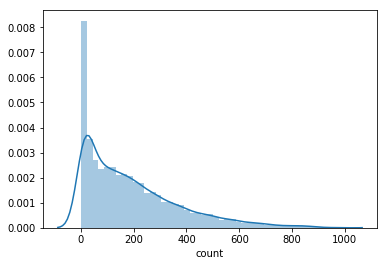

In [4]:
ax = sns.distplot(train_labels)

It seems that the data is skewed. I will take the square root.

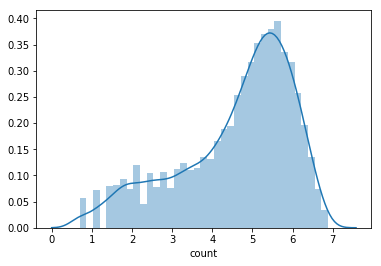

In [5]:
## Log transformation of labels
train_labels = np.log1p(train_labels)
## Now it looks much better
ax = sns.distplot(train_labels)

In [6]:
features["date"] = features.datetime.apply(lambda x : x.split()[0])
features["hour"] = features.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype('int')
features["year"] = features.datetime.apply(lambda x : x.split()[0].split("-")[0])
features["weekday"] = features.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
features["month"] = features.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [ ]:
features

In [7]:
features_nonzerowindspeed=features[['month','year','season','weather','temp','atemp','humidity']][features['windspeed']>0]
features_zerowindspeed=features[['month','year','season','weather','temp','atemp','humidity']][features['windspeed']==0]

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(features_nonzerowindspeed,features['windspeed'][features['windspeed']>0])

pred=rfr.predict(features_zerowindspeed)

features['windspeed'][features['windspeed']==0]=pred


In [ ]:
features

In [8]:
## Standardizing numeric features
numeric_features = features.loc[:,['temp', 'atemp', 'humidity', 'windspeed']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [ ]:
## get dummies for categorical data

#dummies_season = pd.get_dummies(features['season'], prefix= 'season')
#dummies_holiday= pd.get_dummies(features['holiday'], prefix= 'holiday')
#dummies_workingday = pd.get_dummies(features['workingday'], prefix= 'workingday')
#dummies_weather = pd.get_dummies(features['weather'], prefix= 'weather')
#dummies_hour = pd.get_dummies(features['hour'], prefix= 'hour')
#dummies_year = pd.get_dummies(features['year'], prefix= 'year')
#dummies_weekday = pd.get_dummies(features['weekday'], prefix= 'weekday')
#dummies_month = pd.get_dummies(features['month'], prefix= 'month')

#features = pd.concat([features,dummies_season,dummies_holiday,dummies_workingday,dummies_weather,dummies_hour,dummies_year,dummies_weekday,dummies_month], axis=1)
#features.drop(['season','holiday','workingday','weather','hour','year','weekday','month'], axis=1, inplace=True)



In [9]:
## just coerce to categorical type

categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]

for var in categoricalFeatureNames:
    features[var] = features[var].astype("category")

In [10]:
features=features.drop(['casual','registered','date'],axis=1)

In [11]:
### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

In [14]:
features=features.drop(['datetime'],axis=1)
features

atemp holiday  humidity season   temp weather  windspeed  \
train 0     14.395       0        81      1   9.84       1   7.000221   
      1     13.635       0        80      1   9.02       1   6.799863   
      2     13.635       0        80      1   9.02       1   6.799863   
      3     14.395       0        75      1   9.84       1   6.728394   
      4     14.395       0        75      1   9.84       1   6.728394   
      5     12.880       0        75      1   9.84       2   6.003200   
      6     13.635       0        80      1   9.02       1   6.799863   
      7     12.880       0        86      1   8.20       1   6.765355   
      8     14.395       0        75      1   9.84       1   6.728394   
      9     17.425       0        76      1  13.12       1   9.305462   
      10    19.695       0        76      1  15.58       1  16.997900   
      11    16.665       0        81      1  14.76       1  19.001200   
      12    21.210       0        77      1  17.22       1  19.001200   
      13    22.725       0        72      1  18.86       2  19.999500   
      14    22.725       0        72      1  18.86       2  19.001200   
      15    21.970       0        77      1  18.04       2  19.999500   
      16    21.210       0        82      1  17.22       2  19.999500   
      17    21.970       0        82      1  18.04       2  19.001200   
      18    21.210       0        88      1  17.22       3  16.997900   
      19    21.210       0        88      1  17.22       3  16.997900   
      20    20.455       0        87      1  16.40       2  16.997900   
      21    20.455       0        87      1  16.40       2  12.998000   
      22    20.455       0        94      1  16.40       2  15.001300   
      23    22.725       0        88      1  18.86       2  19.999500   
      24    22.725       0        88      1  18.86       2  19.999500   
      25    21.970       0        94      1  18.04       2  16.997900   
      26    21.210       0       100      1  17.22       2  19.001200   
      27    22.725       0        94      1  18.86       2  12.998000   
      28    22.725       0        94      1  18.86       2  12.998000   
      29    21.210       0        77      1  17.22       3  19.999500   
...            ...     ...       ...    ...    ...     ...        ...   
test  6463  10.605       0        44      1   9.84       2  19.999500   
      6464  18.180       0        61      1  13.94       1   7.032578   
      6465   9.850       0        47      1   9.02       1  22.002800   
      6466  10.605       0        51      1   8.20       1  11.001400   
      6467   9.850       0        55      1   8.20       1  12.998000   
      6468   9.850       0        51      1   8.20       1  15.001300   
      6469   9.090       0        55      1   7.38       1  12.998000   
      6470   9.090       0        55      1   7.38       1  12.998000   
      6471   8.335       0        59      1   6.56       1  11.001400   
      6472   9.090       0        59      1   6.56       1   7.001500   
      6473   8.335       0        69      1   5.74       1   7.001500   
      6474   7.575       0        64      1   6.56       1  12.998000   
      6475   8.335       0        64      1   6.56       1  11.001400   
      6476   9.090       0        64      1   6.56       1   8.998100   
      6477   7.575       0        69      1   5.74       1   8.998100   
      6478  10.605       0        64      1   7.38       2   7.001500   
      6479  10.605       0        69      1   8.20       2   8.998100   
      6480  11.365       0        60      1   9.02       2  12.998000   
      6481  11.365       0        56      1   9.84       2  12.998000   
      6482  12.880       0        44      1  10.66       2  11.001400   
      6483  13.635       0        45      1  11.48       2  15.001300   
      6484  14.395       0        45      1  11.48       2   8.998100   
      6485  12.880       0        48      1  10.66       2  12.998000  

In [15]:
from sklearn import linear_model

train_features = features.loc['train']
test_features = features.loc['test']

train_features_st = features_standardized.loc['train']
test_features_st = features_standardized.loc['test']


In [16]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)

In [17]:
# predict for casual first, followed by predict for registered

### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)



In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01);
gbm.fit(train_features,train_labels)
pred=gbm.predict(test_features)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

rfModel.fit(train_features,train_labels)
pred = rfModel.predict(test_features)

In [19]:
## Saving to CSV
pd.DataFrame({'datetime': test.datetime, 'count': [max(0, x) for x in np.exp(pred)]}).to_csv('D:/Github/machine learning/Kaggle/bicycle rental/submission.csv', index =False)